# Introduction

In this file I demonstrate how one can work with transaction data to train a fraud detection model.
We assume that we are observing transactions over a 30-day period for a business client of Standard Bank, Business A.
Data is obtained from kaggle.

## Assumptions

1. Data attributes will not always be the same as in the dataset above
2. Algorithm choice is not exhaustive but meant to demonstrate MVP
3. The buyer's bank is responsible for declining transactions when there is insufficient funds
4. There's no way the business can know how much a customer has in their account, only if they have enough money for transaction
5. 'Transfer' refers to money returned to customer for goods returned
6. Cash-out' refers to money paid out to expemses/donations/bank/
7. 'Payment' 'debit' refers to money received by business

## Import libraries

In [115]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np

## 1. Import data

In [116]:
path = r"C:\Users\mbong\Downloads\PS_20174392719_1491204439457_log.csv"
dataset_raw = pd.read_csv(path)
dataset_raw.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## 2.Data Exploration


1. Check for null values
2. remove columns that would not be available from transaction data for Business A.

In [123]:
dataset_raw.isnull().values.any()


False

In [124]:
new_data = dataset_raw.drop(columns = ['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud'])
#all the columns dropped are column we assume we would not know for the transactions of a business client
new_data.head(10)

,step,type,amount,nameOrig,nameDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0
2,1,TRANSFER,181.00,C1305486145,C553264065,1
3,1,CASH_OUT,181.00,C840083671,C38997010,1
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0
5,1,PAYMENT,7817.71,C90045638,M573487274,0
6,1,PAYMENT,7107.77,C154988899,M408069119,0
7,1,PAYMENT,7861.64,C1912850431,M633326333,0
8,1,PAYMENT,4024.36,C1265012928,M1176932104,0
9,1,DEBIT,5337.77,C712410124,C195600860,0


## Is there a relationship between type of transaction and fraud?

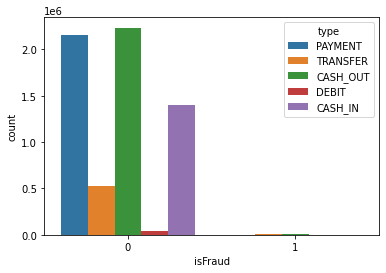

In [125]:
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud",hue ="type", data=new_data)

In [127]:
filter1 = new_data[(new_data["type"]== "PAYMENT") & (new_data['isFraud']==1)]# payment was fraudulent
filter2 = new_data[(new_data["type"]== "DEBIT") & (new_data['isFraud']==1)]
filter3 = new_data[(new_data["type"]== "TRANSFER") & (new_data['isFraud']==1)]
filter4 = new_data[(new_data["type"]== "CASH_OUT") & (new_data['isFraud']==1)]
filter5 = new_data[(new_data["type"]== "CASH_IN") & (new_data['isFraud']==1)]



In [128]:
len(filter1)# number of fraudulent payments


0

In [129]:
len(filter2)# number of fraudulent debits

0

In [130]:

len(filter3) #number of fraudulent transfers

4097

In [131]:
len(filter4)# number of fraudulent cash_outs

4116

In [132]:
len(filter5) # number of fraudulent cash_ins

0

It is clear that in this data set, two transactions contain fraud: cash in and cash out. We extract them


In [133]:
final = new_data[(new_data["type"] =="CASH_OUT") | (new_data["type"] =="TRANSFER")]
final.head(10)

,step,type,amount,nameOrig,nameDest,isFraud
2,1,TRANSFER,181.00,C1305486145,C553264065,1
3,1,CASH_OUT,181.00,C840083671,C38997010,1
15,1,CASH_OUT,229133.94,C905080434,C476402209,0
19,1,TRANSFER,215310.30,C1670993182,C1100439041,0
24,1,TRANSFER,311685.89,C1984094095,C932583850,0
42,1,CASH_OUT,110414.71,C768216420,C1509514333,0
47,1,CASH_OUT,56953.90,C1570470538,C824009085,0
48,1,CASH_OUT,5346.89,C512549200,C248609774,0
51,1,CASH_OUT,23261.30,C2072313080,C2001112025,0
58,1,TRANSFER,62610.80,C1976401987,C1937962514,0


## 3. Train Model





















































































































Normally, we would perform cross validation to pick the strongest algorithm.
But in this case we choose the random forest classifier to show concept.

In [134]:
X=final[['step','type','amount']]#predictors
y=final['isFraud']#target
y=y[:,np.newaxis]

In [137]:
X.loc[X.type == 'TRANSFER', 'type'] = 0 #use 0-1 to avoid float error
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [140]:
#Create a Gaussian Classifier

clf=RandomForestClassifier(n_estimators=50,class_weight={0:0.99704,1:0.00296}) #info in description of data

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc=clf.fit(X_train,y_train)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model = knn.fit(X_train, y_train)


<ipython-input-140-6cf593501d11>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc=clf.fit(X_train,y_train)
<ipython-input-140-6cf593501d11>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model = knn.fit(X_train, y_train)


In [142]:
y_pred1=clf.predict(X_test)
y_pred2=knn_model.predict(X_test)


In [145]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Random Forest Accuracy: 0.9979052438688377


In [146]:
print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred2))

KNN Accuracy: 0.9972206279936905


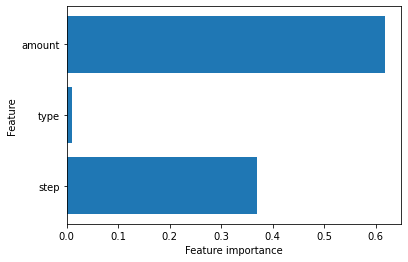

In [147]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = 3
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['step','type','amount'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    
plot_feature_importances(clf)

## 4.Prediction


In [169]:
import random
stplist = X['step'].to_list()
typlist =X['type'].to_list()
maxim = int(X['amount'].max())
minim = int(X['amount'].min())

for transactions in range(20):
    
    ans = rfc.predict([[random.choice(stplist),random.choice(typlist),random.randint(minim,maxim)]])
    if ans[0]== 0:
        print("allowed")
    else:
        print("fraud detected! Check transactions")

fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
allowed
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
allowed
fraud detected! Check transactions
fraud detected! Check transactions


In [173]:
for transactions in range(20):
    
    ans2 = knn_model.predict([[random.choice(stplist),random.choice(typlist),random.randint(minim,maxim)]])
    if ans[0]== 0:
        print("allowed")
    else:
        print("fraud detected! Check transactions")

fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
fraud detected! Check transactions
